## Relax Inc.Sample Take Home Challenge

This is a practice take home challenge from Relax Inc.

The data is available as two attached CSV files:
takehome_user_engagement. csv
takehome_users . csv
The data has the following two tables:
1. A user table ( "takehome_users" ) with data on 12,000 users who signed up for the product in the last two years. This table includes:
* name: the user's name
* object_id: the user's id
* email: email address
* creation_source: how their account was created. This takes on one of 5 values:
    * PERSONAL_PROJECTS: invited to join another user's personal workspace
    * GUEST_INVITE: invited to an organization as a guest (limited permissions)
    * ORG_INVITE: invited to an organization (as a full member)
    * SIGNUP: signed up via the website
    * SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using a Google email account for their login id)
* creation_time: when they created their account
* last_session_creation_time: unix timestamp of last login
* opted_in_to_mailing_list: whether they have opted into receiving marketing emails
* enabled_for_marketing_drip: whether they are on the regular marketing email drip
* org_id: the organization (group of users) they belong to
* invited_by_user_id: which user invited them to join (if applicable).
2. A usage summary table ( "takehome_user_engagement" ) that has a row for each day that a user logged into the product.


Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday period , identify which factors predict future user adoption .


We suggest spending 12
hours on this, but you're welcome to spend more or less.
Please send us a brief writeup of your findings (the more concise, the better no
more
than one page), along with any summary tables, graphs, code, or queries that can help
us understand your approach. Please note any factors you considered or investigation
you did, even if they did not pan out. Feel free to identify any further research or data
you think would be valuable.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_users = pd.read_csv('takehome_users.csv', encoding='latin-1',parse_dates=True)
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
df_engage = pd.read_csv('takehome_user_engagement.csv', parse_dates=True)
df_engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
#look closer at engage
df_engage.user_id.value_counts()

3623     606
906      600
1811     593
7590     590
8068     585
        ... 
3267       1
1218       1
7361       1
11335      1
2047       1
Name: user_id, Length: 8823, dtype: int64

In [5]:
df_engage.visited.value_counts()

1    207917
Name: visited, dtype: int64

Visited is all 1s, so this column is not much of use for further study.

In [6]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [7]:
#Convert time columns to datetime objects


df_engage = df_engage.sort_values(by = ['user_id', 'time_stamp'])
df_engage['time_stamp'] = pd.to_datetime(df_engage['time_stamp'])
df_engage['date'] = df_engage.time_stamp.dt.date


df_users['creation_time'] = pd.to_datetime(df_users['creation_time'])
df_users['last_session_creation_time'] = pd.to_datetime(df_users['last_session_creation_time'], unit='s')

In [8]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [9]:
df_users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [10]:
df_engage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
 3   date        207917 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 7.9+ MB


In [11]:
df_engage.isnull().sum()

time_stamp    0
user_id       0
visited       0
date          0
dtype: int64

Two features in the users dataframe has null values: last_session_creation_time and invited_by_user_id. And no nulls within the engagement dataframe.

The case study overview for the feature 'invited_by_user_id' describes it with the clause "if applicable",  filling missing values in with zero to represent the binary encoding of "No".

As for 'last_session_creation_time' the case study overview describes it as a unix timestamp of last login. Therefore, converting to a datetime object and fill its missing values with the timestamp of when the account was created using feature creation_time.

In [12]:
#handling null values in `invited_by_user_id`
df_users['invited_by_user_id'] = df_users['invited_by_user_id'].fillna(0)

#converting `last_session_creation_time` to a datetime object
df_users['last_session_creation_time'] = pd.to_datetime(df_users['last_session_creation_time'], unit='s')

#handling null values in `last_session_creation_time`
df_users['last_session_creation_time'] = df_users['last_session_creation_time'].fillna(df_users['creation_time'])



The caset study overview states users who have logged into the product on three seperate days in at least one seven-day period are defined as an "adopted user". Therefore, let's determine who in the datasets are adopted users

In [13]:
#create column for the rolling count
def rolling_count(df, freq):
    return df.rolling(freq, on='time_stamp')['visited'].count()

df_engage['visited_7days'] = df_engage.groupby('user_id', as_index=False, group_keys=False).apply(rolling_count, freq='7D')

df_engage



,time_stamp,user_id,visited,date,visited_7days
0,2014-04-22 03:53:30,1,1,2014-04-22,1.0
1,2013-11-15 03:45:04,2,1,2013-11-15,1.0
2,2013-11-29 03:45:04,2,1,2013-11-29,1.0
3,2013-12-09 03:45:04,2,1,2013-12-09,1.0
4,2013-12-25 03:45:04,2,1,2013-12-25,1.0
...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,2013-09-06,1.0
207913,2013-01-15 18:28:37,11997,1,2013-01-15,1.0
207914,2014-04-27 12:45:16,11998,1,2014-04-27,1.0
207915,2012-06-02 11:55:59,11999,1,2012-06-02,1.0


In [14]:
df_engage.user_id.nunique()

8823

In [15]:
adopted = df_engage.loc[(df_engage['visited_7days'] >= 3)]
adopted.user_id.nunique()

1602

There are a total of 1602 adopted users, now creating a column for adopted_users in the user dataframe and use boolean encoding to identify who is "TRUE" and isn't "False" an adopted user.

In [16]:
#remove dups
adopted = adopted.drop_duplicates('user_id', keep = 'first')

#create new column in user df
adoptedID = adopted.user_id.tolist()
df_users['adopted_users'] = df_users['object_id'].isin(adoptedID)

df_users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_users
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,False
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0,False
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,0.0,False
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0,False
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,0.0,False


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'GUEST_INVITE'),
  Text(1, 0, 'ORG_INVITE'),
  Text(2, 0, 'SIGNUP'),
  Text(3, 0, 'PERSONAL_PROJECTS'),
  Text(4, 0, 'SIGNUP_GOOGLE_AUTH')])

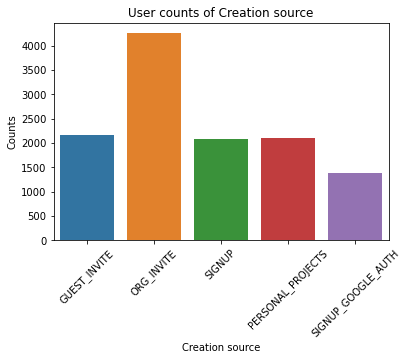

In [17]:
sns.countplot(x='creation_source', data=df_users)
plt.title('User counts of Creation source')
plt.xlabel("Creation source")
plt.ylabel("Counts")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'GUEST_INVITE'),
  Text(1, 0, 'ORG_INVITE'),
  Text(2, 0, 'SIGNUP'),
  Text(3, 0, 'PERSONAL_PROJECTS'),
  Text(4, 0, 'SIGNUP_GOOGLE_AUTH')])

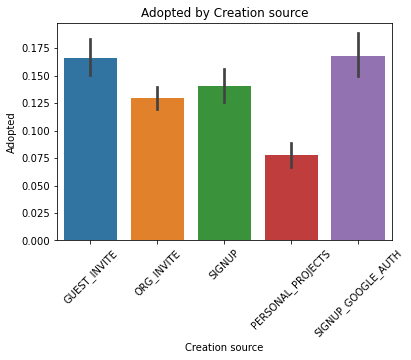

In [18]:
sns.barplot(x='creation_source', y='adopted_users', data=df_users)
plt.title('Adopted by Creation source')
plt.xlabel("Creation source")
plt.ylabel("Adopted")
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

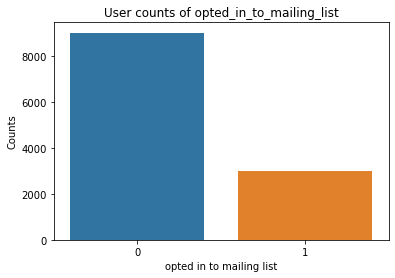

In [19]:
sns.countplot(x='opted_in_to_mailing_list', data=df_users)
plt.title('User counts of opted_in_to_mailing_list')
plt.xlabel("opted in to mailing list")
plt.ylabel("Counts")
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

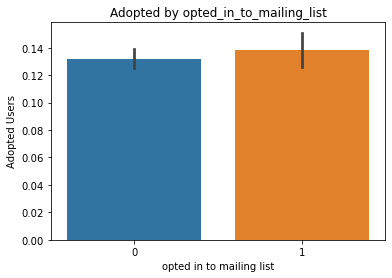

In [20]:
sns.barplot(x='opted_in_to_mailing_list', y='adopted_users', data=df_users)
plt.title('Adopted by opted_in_to_mailing_list')
plt.xlabel("opted in to mailing list")
plt.ylabel("Adopted Users")
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

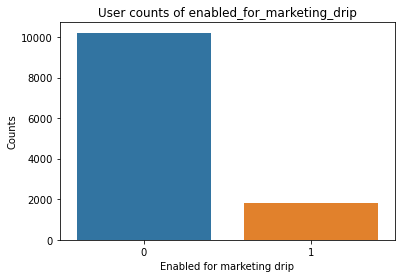

In [21]:
sns.countplot(x='enabled_for_marketing_drip', data=df_users)
plt.title('User counts of enabled_for_marketing_drip')
plt.xlabel("Enabled for marketing drip")
plt.ylabel("Counts")
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

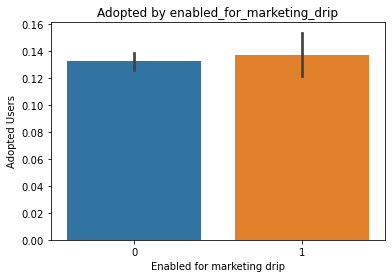

In [22]:
sns.barplot(x='enabled_for_marketing_drip', y='adopted_users', data=df_users)
plt.title('Adopted by enabled_for_marketing_drip')
plt.xlabel("Enabled for marketing drip")
plt.ylabel("Adopted Users")
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

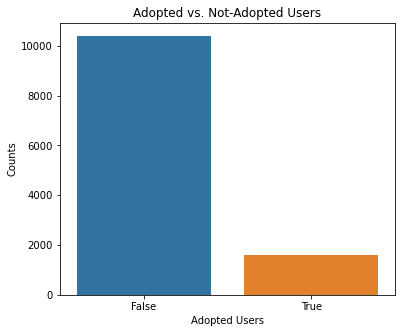

In [23]:
sns.mpl.rc("figure", figsize=(6,5))
sns.barplot(x = list(df_users['adopted_users'].value_counts().index), y = df_users['adopted_users'].value_counts())
plt.title('Adopted vs. Not-Adopted Users')
plt.xlabel("Adopted Users")
plt.ylabel("Counts")
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

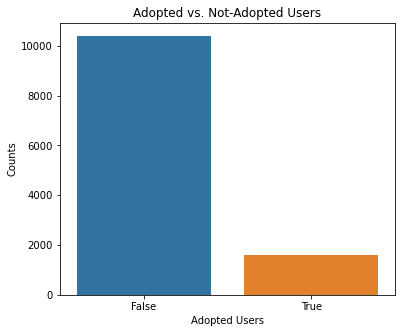

In [24]:
sns.countplot(x='adopted_users', data=df_users)
plt.title('Adopted vs. Not-Adopted Users')
plt.xlabel("Adopted Users")
plt.ylabel("Counts")
plt.xticks(rotation=0)

It is an unbalanced dataset. Need to resample the dataset. I am using SMOTE

In [25]:
# drop features that are used for identification or are in datetime format and get the dataset
df = df_users[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id']]
y = df_users['adopted_users']

In [26]:
# Creating dummy variables for categorical features
X = pd.get_dummies(df, columns = ['creation_source'], drop_first=False)

In [27]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto',random_state=0)
X1, y1 = sm.fit_resample(X, y)

In [28]:
X1.shape,y1.shape

((20796, 9), (20796,))

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [30]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(16636, 9)
(4160, 9)
(16636,)
(4160,)


In [31]:
from sklearn.ensemble import RandomForestClassifier

# Cross validation
clf = RandomForestClassifier()
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.79116587 0.80102194 0.80012023 0.79260595 0.80583108]
Average 5-Fold CV Score: 0.7981490131731058


Using Random Forest Classifier with default parameters, we can get a model with 80.08% accuracy.

In [32]:
# Training the model on the full training data and test on the test set
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [33]:
# Generate classification report
print(classification_report(y_test, y_pred))
print('Test set accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

       False       0.81      0.82      0.82      2089
        True       0.82      0.80      0.81      2071

    accuracy                           0.81      4160
   macro avg       0.81      0.81      0.81      4160
weighted avg       0.81      0.81      0.81      4160

Test set accuracy: 81.20%


In [34]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm, index=range(0,2), columns=range(0,2))

,0,1
0,1723,366
1,416,1655


Text(0.5, 1.0, 'ROC Curve')

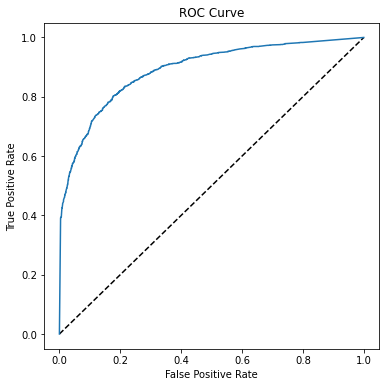

In [35]:
# Compute predicted probabilities
y_pred_prob = rfc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [36]:
# Compute and print AUC score
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8905


The metrics of final model are:

    Test set accuracy: 80.62%
    AUC: 0.8896



In [37]:
#Feature Selection
fi = pd.DataFrame(list(zip(X.columns, rfc.feature_importances_)), columns = ['features', 'Importance'])
fi.sort_values(by='Importance', ascending=False)

,features,Importance
2,org_id,0.399074
3,invited_by_user_id,0.283866
6,creation_source_PERSONAL_PROJECTS,0.065424
4,creation_source_GUEST_INVITE,0.058901
5,creation_source_ORG_INVITE,0.049345
7,creation_source_SIGNUP,0.049193
8,creation_source_SIGNUP_GOOGLE_AUTH,0.047958
0,opted_in_to_mailing_list,0.025131
1,enabled_for_marketing_drip,0.021108


From the importance of features,the most important 3 features are:

    org_id: the organization (group of users) they belong top
    invited_by_user_id: which user invited them to join (if applicable)
    creation_source_PERSONAL_PROJECTS: whether they have opted into receiving marketing emails

